# First Submission to Kaggle

In [167]:
# I will import the model that I will be using for this dataset
from sklearn.ensemble import RandomForestRegressor

In [168]:
# The error metric, in this case we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score
# Anefficient data structure for reading files and other calculations
import pandas as pd
import numpy as np

# Import the data
X = pd.read_csv("train.csv")
y = X.pop("Survived")

In [169]:
X

PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
5              6       3                                   Moran, Mr. James   
6              7       1                            McCarthy, Mr. Timothy J   
7              8       3                     Palsson, Master. Gosta Leonard   
8              9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9             10       2                Nasser, Mrs. Nicholas (Adele Achem)   
10            11       3                    Sandstrom, Miss. Marguerite Rut   
11            12       1                           Bonnell, Miss. Elizabeth   
12            13       3                     Saundercock, Mr. William Henry   
13            14       3                        Andersson, Mr. Anders Johan   
14            15       3               Vestrom, Miss. Hulda Amanda Adolfina   
15            16       2                   Hewlett, Mrs. (Mary D Kingcome)    
16            17       3                               Rice, Master. Eugene   
17            18       2                       Williams, Mr. Charles Eugene   
18            19       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...   
19            20       3                            Masselmani, Mrs. Fatima   
20            21       2                               Fynney, Mr. Joseph J   
21            22       2                              Beesley, Mr. Lawrence   
22            23       3                        McGowan, Miss. Anna "Annie"   
23            24       1                       Sloper, Mr. William Thompson   
24            25       3                      Palsson, Miss. Torborg Danira   
25            26       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
26            27       3                            Emir, Mr. Farred Chehab   
27            28       1                     Fortune, Mr. Charles Alexander   
28            29       3                      O'Dwyer, Miss. Ellen "Nellie"   
29            30       3                                Todoroff, Mr. Lalio   
..           ...     ...                                                ...   
861          862       2                        Giles, Mr. Frederick Edward   
862          863       1  Swift, Mrs. Frederick Joel (Margaret Welles Ba...   
863          864       3                  Sage, Miss. Dorothy Edith "Dolly"   
864          865       2                             Gill, Mr. John William   
865          866       2                           Bystrom, Mrs. (Karolina)   
866          867       2                       Duran y More, Miss. Asuncion   
867          868       1               Roebling, Mr. Washington Augustus II   
868          869       3                        van Melkebeke, Mr. Philemon   
869          870       3                    Johnson, Master. Harold Theodor   
870          871       3                                  Balkic, Mr. Cerin   
871          872       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
872          873       1                           Carlsson, Mr. Frans Olof   
873          874       3                        Vander Cruyssen, Mr. Victor   
874          875       2              Abelson, Mrs. Samuel (Hannah Wizosky)   
875          876       3                   Najib, Miss. Adele Kiamie "Jane"   
876          877       3                      Gustafsson, Mr. Alfred Ossian   
877          878       3                               Petroff, Mr. Nedelio   
878          879       3                                 Laleff, Mr. Kristo   
879          880       1      Potter, Mrs. Thomas Jr (L

In [170]:
# The describe method will only display numerical columns present in the excel file
X.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [171]:
# We can clearly see that the count of age doesn't match with the count for passenger id
# So we will assign the missing values with the mean of age 
X["Age"].fillna(X.Age.mean(), inplace=True)

# confirming that our logic worked
X.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   13.002015    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   22.000000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%     668.500000    3.000000   35.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [172]:
# Get the numeric variables by selecting only the variables that are not object datatypes
numeric_values = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_values].head()
# Head returns the first five rows

PassengerId  Pclass   Age  SibSp  Parch     Fare
0            1       3  22.0      1      0   7.2500
1            2       1  38.0      1      0  71.2833
2            3       3  26.0      0      0   7.9250
3            4       1  35.0      1      0  53.1000
4            5       3  35.0      0      0   8.0500

In [173]:
# Lets build our first model. I always have oob_score = True. It is a good idea to increase n_estimators to a number higher than
# the default. In this case the oob_predictions will be based on a forest of 33 trees. I set random_state=42 so that you all
# replicate the model exactly.
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# I only usenumeric_variables because I have yet to dummy out the categorical variables
model.fit(X[numeric_values], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [174]:
y_oob = model.oob_prediction_
print "c-stat: ", roc_auc_score(y, y_oob)
# We reached our first basic model with 73% accuracy, that's awesome right in so much less time, we reached here.

c-stat:  0.73995515504


In [175]:
y_oob

array([ 0.71111111,  0.72413793,  0.02325581,  0.47368421,  0.16666667,
        0.34146341,  0.64705882,  0.17647059,  0.52777778,  0.75609756,
        0.72222222,  0.29411765,  0.38709677,  0.625     ,  0.87096774,
        0.46875   ,  0.04444444,  0.78571429,  0.41304348,  0.24242424,
        0.88571429,  0.64102564,  0.35897436,  0.5       ,  0.27777778,
        0.05128205,  0.88636364,  0.71428571,  0.46875   ,  0.36842105,
        0.47368421,  0.23684211,  0.84090909,  0.67647059,  0.82051282,
        0.475     ,  0.33333333,  0.225     ,  0.18421053,  0.53191489,
        0.275     ,  0.57777778,  0.11904762,  0.90625   ,  0.36363636,
        0.0625    ,  0.61764706,  0.62162162,  0.44186047,  0.16129032,
        0.25      ,  0.70833333,  0.25      ,  0.61290323,  0.36363636,
        0.4       ,  0.66666667,  0.5       ,  1.        ,  0.13157895,
        0.33333333,  0.2       ,  0.76923077,  0.21428571,  0.5       ,
        0.25      ,  0.36842105,  0.33333333,  0.4516129 ,  0.10

In [176]:
# Here is an important function that is used to pick out the categorical variables
def describe_categorical(X):
    """
    just like .describe(), but this returns results for categorical variables only
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [177]:
describe_categorical(X)

In [178]:
# change the cabin variable to be only the first letter or None, cleaning the dataset
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
X["Cabin"] = X.Cabin.apply(clean_cabin)

In [179]:
# fancy loop, important
categorical_variables = ['Sex', 'Cabin', 'Embarked']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    #create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [180]:
X

PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
5              6       3                                   Moran, Mr. James   
6              7       1                            McCarthy, Mr. Timothy J   
7              8       3                     Palsson, Master. Gosta Leonard   
8              9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9             10       2                Nasser, Mrs. Nicholas (Adele Achem)   
10            11       3                    Sandstrom, Miss. Marguerite Rut   
11            12       1                           Bonnell, Miss. Elizabeth   
12            13       3                     Saundercock, Mr. William Henry   
13            14       3                        Andersson, Mr. Anders Johan   
14            15       3               Vestrom, Miss. Hulda Amanda Adolfina   
15            16       2                   Hewlett, Mrs. (Mary D Kingcome)    
16            17       3                               Rice, Master. Eugene   
17            18       2                       Williams, Mr. Charles Eugene   
18            19       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...   
19            20       3                            Masselmani, Mrs. Fatima   
20            21       2                               Fynney, Mr. Joseph J   
21            22       2                              Beesley, Mr. Lawrence   
22            23       3                        McGowan, Miss. Anna "Annie"   
23            24       1                       Sloper, Mr. William Thompson   
24            25       3                      Palsson, Miss. Torborg Danira   
25            26       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
26            27       3                            Emir, Mr. Farred Chehab   
27            28       1                     Fortune, Mr. Charles Alexander   
28            29       3                      O'Dwyer, Miss. Ellen "Nellie"   
29            30       3                                Todoroff, Mr. Lalio   
..           ...     ...                                                ...   
861          862       2                        Giles, Mr. Frederick Edward   
862          863       1  Swift, Mrs. Frederick Joel (Margaret Welles Ba...   
863          864       3                  Sage, Miss. Dorothy Edith "Dolly"   
864          865       2                             Gill, Mr. John William   
865          866       2                           Bystrom, Mrs. (Karolina)   
866          867       2                       Duran y More, Miss. Asuncion   
867          868       1               Roebling, Mr. Washington Augustus II   
868          869       3                        van Melkebeke, Mr. Philemon   
869          870       3                    Johnson, Master. Harold Theodor   
870          871       3                                  Balkic, Mr. Cerin   
871          872       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
872          873       1                           Carlsson, Mr. Frans Olof   
873          874       3                        Vander Cruyssen, Mr. Victor   
874          875       2              Abelson, Mrs. Samuel (Hannah Wizosky)   
875          876       3                   Najib, Miss. Adele Kiamie "Jane"   
876          877       3                      Gustafsson, Mr. Alfred Ossian   
877          878       3                               Petroff, Mr. Nedelio   
878          879       3                                 Laleff, Mr. Kristo   
879          880       1      Potter, Mrs. Thomas Jr (L

In [181]:
X = X.drop(['Name'], axis=1)
X = X.drop(["Ticket"], axis=1)
X = X.drop(["Cabin_T"], axis=1)
X = X.drop(["Embarked_Missing"], axis=1)
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X,y)
print "C-state: ", roc_auc_score(y, model.oob_prediction_)

C-state:  0.850307310474


In [182]:
X

PassengerId  Pclass        Age  SibSp  Parch      Fare  Sex_female  \
0              1       3  22.000000      1      0    7.2500           0   
1              2       1  38.000000      1      0   71.2833           1   
2              3       3  26.000000      0      0    7.9250           1   
3              4       1  35.000000      1      0   53.1000           1   
4              5       3  35.000000      0      0    8.0500           0   
5              6       3  29.699118      0      0    8.4583           0   
6              7       1  54.000000      0      0   51.8625           0   
7              8       3   2.000000      3      1   21.0750           0   
8              9       3  27.000000      0      2   11.1333           1   
9             10       2  14.000000      1      0   30.0708           1   
10            11       3   4.000000      1      1   16.7000           1   
11            12       1  58.000000      0      0   26.5500           1   
12            13       3  20.000000      0      0    8.0500           0   
13            14       3  39.000000      1      5   31.2750           0   
14            15       3  14.000000      0      0    7.8542           1   
15            16       2  55.000000      0      0   16.0000           1   
16            17       3   2.000000      4      1   29.1250           0   
17            18       2  29.699118      0      0   13.0000           0   
18            19       3  31.000000      1      0   18.0000           1   
19            20       3  29.699118      0      0    7.2250           1   
20            21       2  35.000000      0      0   26.0000           0   
21            22       2  34.000000      0      0   13.0000           0   
22            23       3  15.000000      0      0    8.0292           1   
23            24       1  28.000000      0      0   35.5000           0   
24            25       3   8.000000      3      1   21.0750           1   
25            26       3  38.000000      1      5   31.3875           1   
26            27       3  29.699118      0      0    7.2250           0   
27            28       1  19.000000      3      2  263.0000           0   
28            29       3  29.699118      0      0    7.8792           1   
29            30       3  29.699118      0      0    7.8958           0   
..           ...     ...        ...    ...    ...       ...         ...   
861          862       2  21.000000      1      0   11.5000           0   
862          863       1  48.000000      0      0   25.9292           1   
863          864       3  29.699118      8      2   69.5500           1   
864          865       2  24.000000      0      0   13.0000           0   
865          866       2  42.000000      0      0   13.0000           1   
866          867       2  27.000000      1      0   13.8583           1   
867          868       1  31.000000      0      0   50.4958           0   
868          869       3  29.699118      0      0    9.5000           0   
869          870       3   4.000000      1      1   11.1333           0   
870          871       3  26.000000      0      0    7.8958           0   
871          872       1  47.000000      1      1   52.5542           1   
872          873       1  33.000000      0      0    5.0000           0   
873          874       3  47.000000      0      0    9.0000           0   
874          875       2  28.000000      1      0   24.0000           1   
875          876       3  15.000000      0      0    7.2250           1   
876          877       3  20.000000      0      0    9.8458           0   
877          878       3  19.000000      0      0    7.8958           0   
878          879       3  29.699118      0      0    7.8958           0   
879          880       1  56.000000      0      1   83.1583           1   
880          881       2  25.000000      0      1   26.0000           1   
881          882       3  33.000000      0      0    7.8958           0   
882          883       3  22.0

In [183]:
# Now we will calculate the variable which are important for us
model.feature_importances_

array([ 0.18572942,  0.08839083,  0.15497507,  0.03739139,  0.01569309,
        0.15114829,  0.13769385,  0.1570271 ,  0.0027    ,  0.00205602,
        0.00499765,  0.00242328,  0.00688004,  0.00038655,  0.00058992,
        0.02464331,  0.00896807,  0.00621618,  0.01208993])

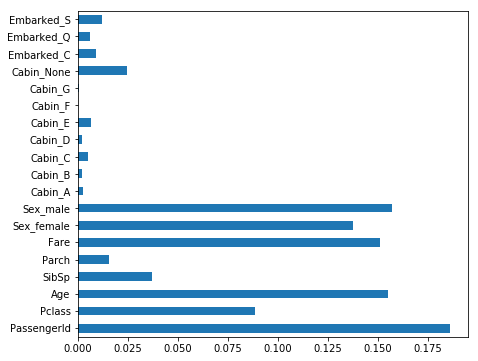

In [184]:
%matplotlib inline
# Let's view the variable importance in the form of a graph, it will help us know better
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values()
feature_importances.plot(kind="barh", figsize=(7,6))

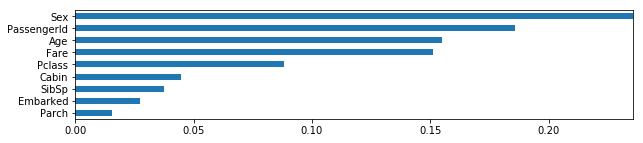

In [185]:
# another important method that you could use it for visualize important variables in graph form
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    Graphs the feature_importances of a random decision forest using a horizontal bar chart
    Probably works but untested on other sklearn.ensembles.
    """
    if autoscale:
        x_scale = model.feature_importances_.max() + headroom
    else:
        x_scale = 1
    feature_dict = dict(zip(feature_names, model.feature_importances_))
    if summarized_columns:
        # some dummy columns need to be summarized
        for col_name in summarized_columns:
            # sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i)
            
            # now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort_values(inplace=True)
    results.plot(kind="barh", figsize=(width, len(results)/4), xlim=(0, x_scale))

graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)

In [186]:
# parameter tests n_estimators
#results = []
#n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

#for trees in n_estimator_options:
    #model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    #model.fit(X, y)
    #print trees, "trees"
    #roc = roc_auc_score(y, model.oob_prediction_)
    #print "C-stat: ", roc
    #results.append(roc)
    #print ""
#pd.Series(results, n_estimator_options).plot()  


In [187]:
test_x = pd.read_csv("test.csv")

In [188]:
test_x

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
..           ...     ...                                                ...   
388         1280       3                               Canavan, Mr. Patrick   
389         1281       3                        Palsson, Master. Paul Folke   
390         1282       1                         Payne, Mr. Vivian Ponsonby   
391         1283       1     Lines, Mrs. Ernest H (Elizabeth Lindsey James)   
392         1284       3                      Abbott, Master. Eugene Joseph   
393         1285       2                               Gilbert, Mr. William   
394         1286       3                           Kink-Heilmann, Mr. Anton   
395         1287       1     Smith, Mrs. Lucien Philip (Mary Eloise Hughes)   
396         1288       3                               Colbert, Mr. Patrick   
397         1289       1  Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...   
398         1290       3                     Larsson-Rondberg, Mr. Edvard A   
399         1291       3                           Conlon, Mr. Thomas Henry   
400         1292       1                            Bonnell, Miss. Caroline   
401         1293       2                                    Gale, Mr. Harry   
402         1294       1                     Gibson, Miss. Dorothy Winifred   
403         1295       1                             Carrau, Mr. Jose Pedro   
404         1296       1                       Frauenthal, Mr. Isaac Gerald   
405         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
406         1298       2                          Ware,

In [189]:
test_x["Cabin"] = test_x.Cabin.apply(clean_cabin)

In [190]:
for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    test_x[variable].fillna("Missing", inplace=True)
    #create array of dummies
    dummies = pd.get_dummies(test_x[variable], prefix=variable)
    # update X to include dummies and drop the main variable
    test_x = pd.concat([test_x, dummies], axis=1)
    test_x.drop([variable], axis=1, inplace=True)

In [191]:
test_x

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
..           ...     ...                                                ...   
388         1280       3                               Canavan, Mr. Patrick   
389         1281       3                        Palsson, Master. Paul Folke   
390         1282       1                         Payne, Mr. Vivian Ponsonby   
391         1283       1     Lines, Mrs. Ernest H (Elizabeth Lindsey James)   
392         1284       3                      Abbott, Master. Eugene Joseph   
393         1285       2                               Gilbert, Mr. William   
394         1286       3                           Kink-Heilmann, Mr. Anton   
395         1287       1     Smith, Mrs. Lucien Philip (Mary Eloise Hughes)   
396         1288       3                               Colbert, Mr. Patrick   
397         1289       1  Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...   
398         1290       3                     Larsson-Rondberg, Mr. Edvard A   
399         1291       3                           Conlon, Mr. Thomas Henry   
400         1292       1                            Bonnell, Miss. Caroline   
401         1293       2                                    Gale, Mr. Harry   
402         1294       1                     Gibson, Miss. Dorothy Winifred   
403         1295       1                             Carrau, Mr. Jose Pedro   
404         1296       1                       Frauenthal, Mr. Isaac Gerald   
405         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
406         1298       2                          Ware,

In [192]:
test_x = test_x.drop(["Name"], axis=1)
test_x = test_x.drop(["Ticket"], axis=1)
test_x["Age"].fillna(test_x.Age.mean(), inplace=True)

In [193]:
test_x

PassengerId  Pclass       Age  SibSp  Parch      Fare  Sex_female  \
0            892       3  34.50000      0      0    7.8292           0   
1            893       3  47.00000      1      0    7.0000           1   
2            894       2  62.00000      0      0    9.6875           0   
3            895       3  27.00000      0      0    8.6625           0   
4            896       3  22.00000      1      1   12.2875           1   
5            897       3  14.00000      0      0    9.2250           0   
6            898       3  30.00000      0      0    7.6292           1   
7            899       2  26.00000      1      1   29.0000           0   
8            900       3  18.00000      0      0    7.2292           1   
9            901       3  21.00000      2      0   24.1500           0   
10           902       3  30.27259      0      0    7.8958           0   
11           903       1  46.00000      0      0   26.0000           0   
12           904       1  23.00000      1      0   82.2667           1   
13           905       2  63.00000      1      0   26.0000           0   
14           906       1  47.00000      1      0   61.1750           1   
15           907       2  24.00000      1      0   27.7208           1   
16           908       2  35.00000      0      0   12.3500           0   
17           909       3  21.00000      0      0    7.2250           0   
18           910       3  27.00000      1      0    7.9250           1   
19           911       3  45.00000      0      0    7.2250           1   
20           912       1  55.00000      1      0   59.4000           0   
21           913       3   9.00000      0      1    3.1708           0   
22           914       1  30.27259      0      0   31.6833           1   
23           915       1  21.00000      0      1   61.3792           0   
24           916       1  48.00000      1      3  262.3750           1   
25           917       3  50.00000      1      0   14.5000           0   
26           918       1  22.00000      0      1   61.9792           1   
27           919       3  22.50000      0      0    7.2250           0   
28           920       1  41.00000      0      0   30.5000           0   
29           921       3  30.27259      2      0   21.6792           0   
..           ...     ...       ...    ...    ...       ...         ...   
388         1280       3  21.00000      0      0    7.7500           0   
389         1281       3   6.00000      3      1   21.0750           0   
390         1282       1  23.00000      0      0   93.5000           0   
391         1283       1  51.00000      0      1   39.4000           1   
392         1284       3  13.00000      0      2   20.2500           0   
393         1285       2  47.00000      0      0   10.5000           0   
394         1286       3  29.00000      3      1   22.0250           0   
395         1287       1  18.00000      1      0   60.0000           1   
396         1288       3  24.00000      0      0    7.2500           0   
397         1289       1  48.00000      1      1   79.2000           1   
398         1290       3  22.00000      0      0    7.7750           0   
399         1291       3  31.00000      0      0    7.7333           0   
400         1292       1  30.00000      0      0  164.8667           1   
401         1293       2  38.00000      1      0   21.0000           0   
402         1294       1  22.00000      0      1   59.4000           1   
403         1295       1  17.00000      0      0   47.1000           0   
404         1296       1  43.00000      1      0   27.7208           0   
405         1297       2  20.00000      0      0   13.8625           0   
406         1298       2  23.00000      1      0   10.5000           0   
407         1299       1  50.00000      1      1  211.5000           0   
408         1300       3  30.27259      0      0    7.7208           1   
409         1301       3   3.00000      1      1   13.7750           1   
410      

In [194]:
np.any(np.isnan(test_x))
np.all(np.isfinite(test_x))
test_x = test_x.fillna(method='ffill')

In [195]:
test_y = model.predict(test_x)

In [196]:
test_y

array([ 0.14,  0.32,  0.27,  0.25,  0.41,  0.03,  0.65,  0.04,  0.77,
        0.01,  0.01,  0.2 ,  1.  ,  0.19,  0.96,  0.95,  0.09,  0.48,
        0.29,  0.33,  0.31,  0.67,  1.  ,  0.39,  0.97,  0.01,  1.  ,
        0.43,  0.5 ,  0.15,  0.01,  0.05,  0.48,  0.12,  0.59,  0.45,
        0.3 ,  0.23,  0.  ,  0.44,  0.27,  0.51,  0.02,  0.98,  0.98,
        0.07,  0.63,  0.38,  0.97,  0.51,  0.5 ,  0.32,  0.96,  0.88,
        0.25,  0.06,  0.  ,  0.12,  0.01,  1.  ,  0.01,  0.14,  0.04,
        0.75,  0.81,  0.98,  0.55,  0.25,  0.73,  0.87,  0.63,  0.01,
        0.24,  0.66,  1.  ,  0.53,  0.03,  0.74,  0.03,  0.63,  0.84,
        0.36,  0.17,  0.01,  0.16,  0.09,  0.62,  0.41,  0.35,  0.92,
        0.29,  0.08,  0.95,  0.03,  0.46,  0.02,  0.96,  0.14,  0.31,
        0.02,  0.99,  0.06,  0.38,  0.04,  0.49,  0.01,  0.35,  0.38,
        0.12,  0.29,  0.14,  0.37,  1.  ,  0.59,  0.97,  0.37,  0.03,
        0.64,  0.51,  0.92,  1.  ,  0.34,  1.  ,  0.05,  0.38,  0.5 ,
        0.02,  0.47,

In [197]:
test_x['Survived'] = test_y

In [198]:
test_x.loc[test_x['Survived'] >= 0.80, 'Survived'] = '1'
test_x.loc[test_x['Survived'] < 0.80, 'Survived'] = '0'

In [199]:
test_x[['PassengerId', 'Survived']].to_csv('results-rf.csv', index=False)
final_ans = pd.read_csv('results-rf.csv')

In [200]:
final_ans

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         0
7            899         0
8            900         0
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         0
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
393         1285         0
394         1286         0
395         1287         1
396         1288         0
397         1289         1
398         1290         0
399         1291         0
400         1292         1
401         1293         0
402         1294         1
403         1295         0
404         1296         0
405         1297         0
406         1298         0
407         1299         0
408         1300         0
409         1301         0
410         1302         0
411         1303         1
412         1304         0
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]